# 自己回帰

### データインポート

In [1]:
data(BJsales)

### プロット

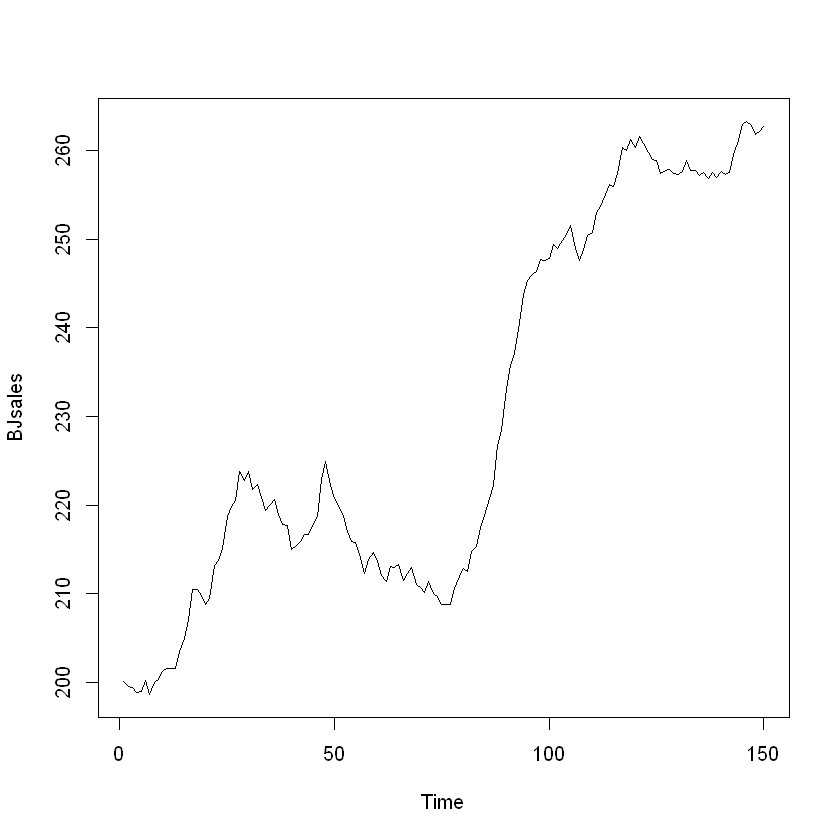

In [2]:
plot(BJsales)

### 自己相関（コレログラム）

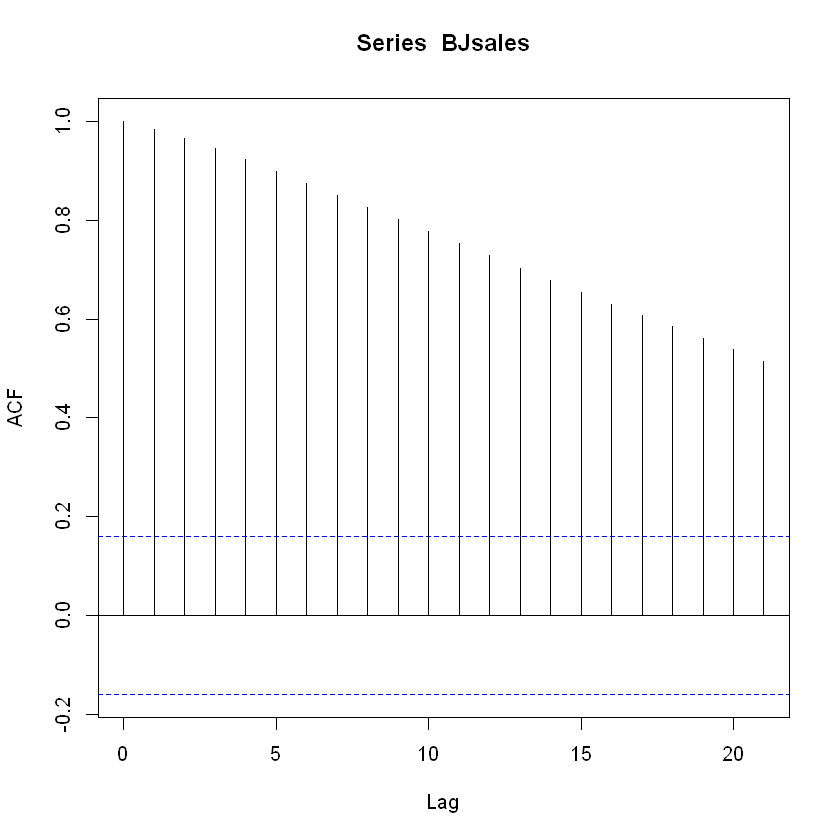

In [3]:
acf(BJsales)

In [4]:
BJsales

A Time Series:
  [1] 200.1 199.5 199.4 198.9 199.0 200.2 198.6 200.0 200.3 201.2 201.6 201.5
 [13] 201.5 203.5 204.9 207.1 210.5 210.5 209.8 208.8 209.5 213.2 213.7 215.1
 [25] 218.7 219.8 220.5 223.8 222.8 223.8 221.7 222.3 220.8 219.4 220.1 220.6
 [37] 218.9 217.8 217.7 215.0 215.3 215.9 216.7 216.7 217.7 218.7 222.9 224.9
 [49] 222.2 220.7 220.0 218.7 217.0 215.9 215.8 214.1 212.3 213.9 214.6 213.6
 [61] 212.1 211.4 213.1 212.9 213.3 211.5 212.3 213.0 211.0 210.7 210.1 211.4
 [73] 210.0 209.7 208.8 208.8 208.8 210.6 211.9 212.8 212.5 214.8 215.3 217.5
 [85] 218.8 220.7 222.2 226.7 228.4 233.2 235.7 237.1 240.6 243.8 245.3 246.0
 [97] 246.3 247.7 247.6 247.8 249.4 249.0 249.9 250.5 251.5 249.0 247.6 248.8
[109] 250.4 250.7 253.0 253.7 255.0 256.2 256.0 257.4 260.4 260.0 261.3 260.4
[121] 261.6 260.8 259.8 259.0 258.9 257.4 257.7 257.9 257.4 257.3 257.6 258.9
[133] 257.8 257.7 257.2 257.5 256.8 257.5 257.0 257.6 257.3 257.5 259.6 261.1
[145] 262.9 263.3 262.8 261.8 262.2 262.7


Autocorrelations of series 'BJsales', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.983 0.965 0.945 0.923 0.899 0.875 0.850 0.825 0.801 0.777 0.753 0.728 
   13    14    15    16    17    18    19    20    21 
0.702 0.678 0.653 0.630 0.608 0.585 0.561 0.538 0.514 

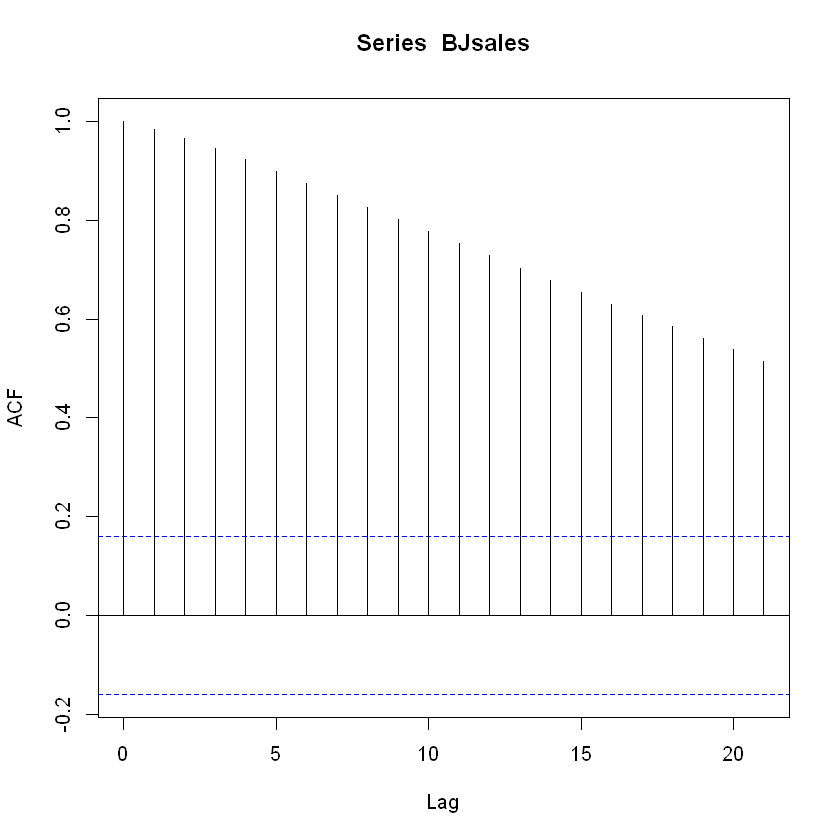

In [5]:
a <- acf(BJsales)
a

### 地道に...。

In [6]:
# 平均
d.m <- mean(BJsales)
d.m

[1] 229.978

In [9]:
# t=1, t-1=0 つまり1期前との自己相関
y0 <- BJsales[1]
y0
y1 <- BJsales[2]
y1

[1] 200.1

[1] 199.5

In [11]:
# 残差（自己共分散関数）
resi1 <- y0 - d.m
resi1
resi2 <- y1 - d.m
resi2
resi <- resi1 * resi2
resi

[1] -29.878

[1] -30.478

[1] 910.6217

In [20]:
# 
(y0 - d.m)
c0 <- (y0 - d.m)^2
cc0  <- ((y0 - d.m) + (y0 - d.m))
cc1 <- cc0^2
cc1
cc2 <- sqrt(cc1)
cc2
(y0 - d.m)^2
var(y0)

[1] -29.878

[1] 3570.78

[1] 59.756

[1] 892.6949

[1] NA

In [16]:
resi / c0
c0 / resi

[1] 1.020082

[1] 0.9803137

### 散布図的に...。

In [34]:
library(ggplot2)

[1] 150

[1] 200.1 199.5 199.4 198.9 199.0 200.2 198.6 200.0 200.3 201.2 201.6 201.5
 [13] 201.5 203.5 204.9 207.1 210.5 210.5 209.8 208.8 209.5 213.2 213.7 215.1
 [25] 218.7 219.8 220.5 223.8 222.8 223.8 221.7 222.3 220.8 219.4 220.1 220.6
 [37] 218.9 217.8 217.7 215.0 215.3 215.9 216.7 216.7 217.7 218.7 222.9 224.9
 [49] 222.2 220.7 220.0 218.7 217.0 215.9 215.8 214.1 212.3 213.9 214.6 213.6
 [61] 212.1 211.4 213.1 212.9 213.3 211.5 212.3 213.0 211.0 210.7 210.1 211.4
 [73] 210.0 209.7 208.8 208.8 208.8 210.6 211.9 212.8 212.5 214.8 215.3 217.5
 [85] 218.8 220.7 222.2 226.7 228.4 233.2 235.7 237.1 240.6 243.8 245.3 246.0
 [97] 246.3 247.7 247.6 247.8 249.4 249.0 249.9 250.5 251.5 249.0 247.6 248.8
[109] 250.4 250.7 253.0 253.7 255.0 256.2 256.0 257.4 260.4 260.0 261.3 260.4
[121] 261.6 260.8 259.8 259.0 258.9 257.4 257.7 257.9 257.4 257.3 257.6 258.9
[133] 257.8 257.7 257.2 257.5 256.8 257.5 257.0 257.6 257.3 257.5 259.6 261.1
[145] 262.9 263.3 262.8 261.8 262.2

[1] 199.5 199.4 198.9 199.0 200.2 198.6 200.0 200.3 201.2 201.6 201.5 201.5
 [13] 203.5 204.9 207.1 210.5 210.5 209.8 208.8 209.5 213.2 213.7 215.1 218.7
 [25] 219.8 220.5 223.8 222.8 223.8 221.7 222.3 220.8 219.4 220.1 220.6 218.9
 [37] 217.8 217.7 215.0 215.3 215.9 216.7 216.7 217.7 218.7 222.9 224.9 222.2
 [49] 220.7 220.0 218.7 217.0 215.9 215.8 214.1 212.3 213.9 214.6 213.6 212.1
 [61] 211.4 213.1 212.9 213.3 211.5 212.3 213.0 211.0 210.7 210.1 211.4 210.0
 [73] 209.7 208.8 208.8 208.8 210.6 211.9 212.8 212.5 214.8 215.3 217.5 218.8
 [85] 220.7 222.2 226.7 228.4 233.2 235.7 237.1 240.6 243.8 245.3 246.0 246.3
 [97] 247.7 247.6 247.8 249.4 249.0 249.9 250.5 251.5 249.0 247.6 248.8 250.4
[109] 250.7 253.0 253.7 255.0 256.2 256.0 257.4 260.4 260.0 261.3 260.4 261.6
[121] 260.8 259.8 259.0 258.9 257.4 257.7 257.9 257.4 257.3 257.6 258.9 257.8
[133] 257.7 257.2 257.5 256.8 257.5 257.0 257.6 257.3 257.5 259.6 261.1 262.9
[145] 263.3 262.8 261.8 262.2 262.7

[1] 0.9977236

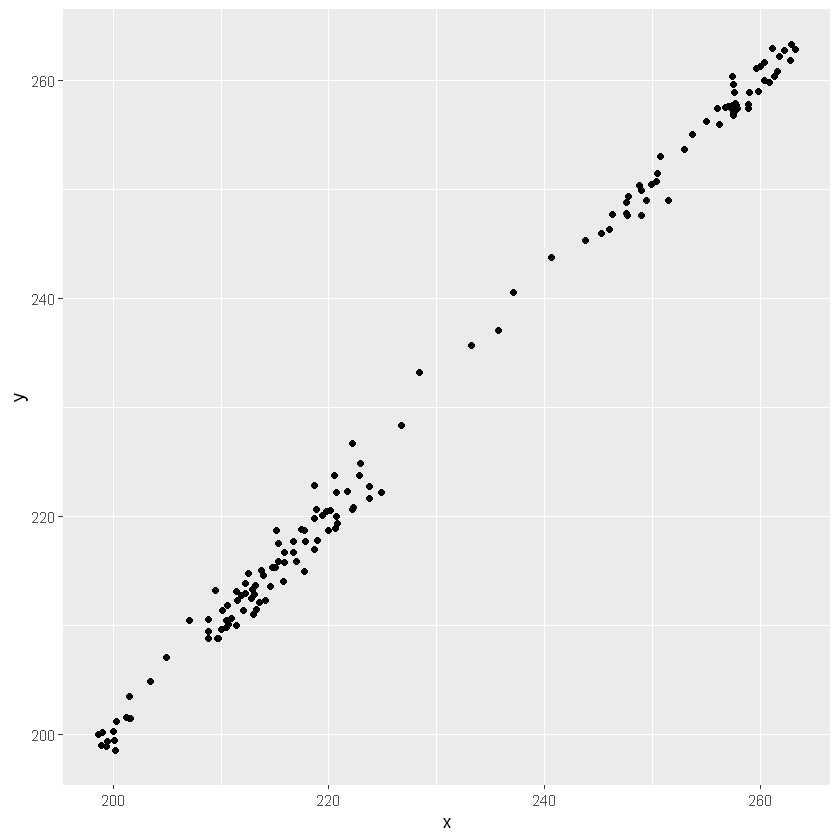

In [36]:
# x = 1期目, y = 2期目
x  <- as.numeric(BJsales)
#x
length(x)
# 行末のxを削除
x <- x[-length(x)]
x

y <- as.numeric(BJsales)
#y
# 先頭行を削除
y <- y[-1]
y

ggplot(as.data.frame(cbind(x, y)), aes(x = x, y = y)) +
  geom_point()
cor(x, y)


### 時系列的に...。

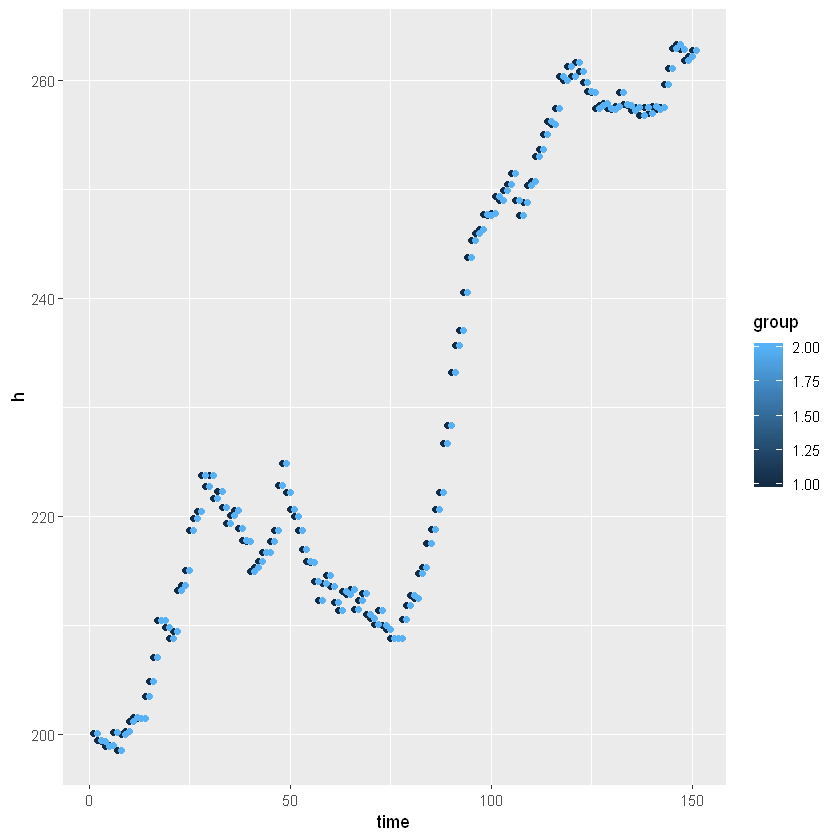

In [45]:
# 1期目
h1 <- as.numeric(BJsales)
time1 <- c(1:150)
group1 <- 1
h11 <- as.data.frame(cbind(time1, h1, group1))
names(h11)  <- c("time", "h", "group")
#h11

# 2期目
h2 <- as.numeric(BJsales)
time2 <- c(2:151)
group2 <- 2
h12 <- as.data.frame(cbind(time2, h2, group2))
names(h12)  <- c("time", "h", "group")
#h12

h <- rbind(h11, h12)

ggplot(h, aes(x = time, y = h, fill = group, colour = group)) +
  geom_point()

#plot(BJsales)